In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8)})

# Part 2: Load some crime-data into `pandas`

Go and check out the [Python Bootcamp](https://nbviewer.org/github/suneman/socialdata2022/blob/main/lectures/PythonBootcamp.ipynb) lecture if you don't know what "loading data into Pandas" means. If you're used to using Pandas, then it's finally time to get your hands on some data!!

> *Exercise 1*
>
> * Go to https://datasf.org/opendata/
> * Click on "Public Safety"
> * Download all police incidence reports, historical 2003 to may 2018. You can get everything as a big CSV file if you press the *Export* button (it's a snappy little ~500MB file).
> * Load the data into `pandas` using thie tips and tricks described [here](https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/).
> * Use pandas to generate the following simple statistics
>   - Report the total number of crimes in the dataset.
>   - List the various categories of crime. How many are there? 
>   - List the number of crimes in each category.

In [2]:
# Load data
df = pd.read_csv('crimedata.csv')

In [3]:
# Get overview of data
df['Year'] = df['Date'].str[-4:]
df.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year
0,3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003
1,5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,97.0,2005
2,6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,106.0,2006
3,7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0,2007
4,11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011


In [4]:
# Number of unique incidents
print(len(set(df['IncidntNum'])))

1703626


In [5]:
# Crime categories
print(set(df['Category']))
print(len(set(df['Category'])))

{'LOITERING', 'SUSPICIOUS OCC', 'PORNOGRAPHY/OBSCENE MAT', 'TRESPASS', 'BURGLARY', 'EXTORTION', 'DRUG/NARCOTIC', 'VANDALISM', 'ROBBERY', 'ASSAULT', 'LARCENY/THEFT', 'SECONDARY CODES', 'VEHICLE THEFT', 'BAD CHECKS', 'MISSING PERSON', 'RECOVERED VEHICLE', 'DISORDERLY CONDUCT', 'KIDNAPPING', 'SEX OFFENSES, NON FORCIBLE', 'EMBEZZLEMENT', 'OTHER OFFENSES', 'FORGERY/COUNTERFEITING', 'SEX OFFENSES, FORCIBLE', 'STOLEN PROPERTY', 'GAMBLING', 'FRAUD', 'WEAPON LAWS', 'LIQUOR LAWS', 'SUICIDE', 'DRUNKENNESS', 'NON-CRIMINAL', 'ARSON', 'BRIBERY', 'TREA', 'DRIVING UNDER THE INFLUENCE', 'PROSTITUTION', 'WARRANTS'}
37


In [6]:
df['Category'].value_counts()

LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79087
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
SEX OFFENSES, FORCIBLE           8747
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4282
ARSON                            3875
EMBEZZLEMENT


---

In order to do awesome *predictive policing* later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last  years on the San Francisco crime scene. 

> *Exercise 2*: The types of crimes. The first field we'll dig into is the column "Category".
> * We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?
> * Create a bar-plot over crime occurrences (**N.B.** for a plot to be informative we have to remember to add any relevant info, e.g., title, labels, etc.). Mine looks like this 

<div>
<img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png" width="700"/>
</div>



[Text(0.5, 0, 'Crime category'), Text(0, 0.5, 'Occurences')]

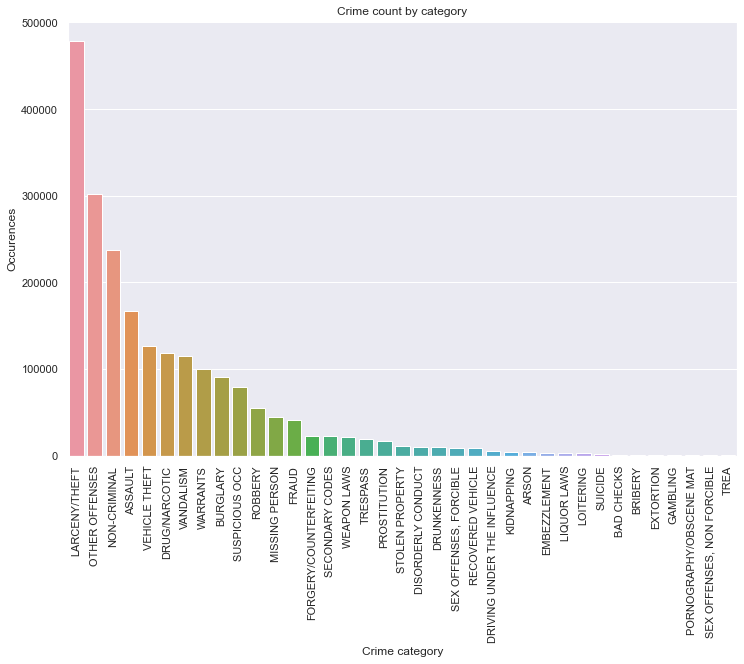

In [7]:
plt.xticks(rotation=90)
plt.title("Crime count by category")
ax = sns.countplot(x='Category', data=df,order = df['Category'].value_counts().index)
ax.set(xlabel='Crime category', ylabel='Occurences')

---

The plot above already gives us a bit of information but does not tell us anything about how crimes changed over the years. Let's have a look at it!

> *Exercise 3*: Temporal patterns.
> * To start off easily, let's count the number of crimes per year:
>     * What is the year with most crimes? 
>     * What is the year with less crimes? (**hint** if your result is 2018, have a further look at the data you have. Is it complete? If not, how would you pre-process the data to answer these questions?).
>     * What's the average number of crimes per year? 
> * Now, let's change our bar-plot above by replacing the count with the *average number of crimes per year by category* and by adding its *standard deviation*.
> * Finally, Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.
> 

In [9]:
# Most and least criminal years, 2015 and 2011
df = df[df['Year'] != '2018']
print(df['Year'].value_counts())
print(sum(df['Year'].value_counts()) / len(set(df['Year'])))



2015    151459
2017    149487
2013    147664
2016    145994
2014    144844
2003    142803
2004    142054
2005    137048
2012    135464
2008    135242
2009    134309
2006    131856
2007    131771
2010    127758
2011    126713
Name: Year, dtype: int64
138964.4


2015    151459
2017    149487
2013    147664
2016    145994
2014    144844
2003    142803
2004    142054
2005    137048
2012    135464
2008    135242
2009    134309
2006    131856
2007    131771
2010    127758
2011    126713
Name: Year, dtype: int64